In [34]:
from Extract_Features import extract_features, feature_selection_SHAP, clustering_selection
from Extract_Features import replace_missing_value
from tsfresh.examples import load_robot_execution_failures
import pandas as pd
import tsfresh
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from ML.feature_selection import FeatureSelection
from ML.model import Model
from ML.process_data import Data
from utils.help_classes import ScalerEnum, ModelsEnum
from tqdm import tqdm

from utils.help_classes import ModelsEnum
from sklearn.model_selection import train_test_split
import os
import datetime

import pickle
import numpy as np
import category_encoders as ce
import plotly_express as px
from sklearn.decomposition import PCA

from numpy.linalg import LinAlgError
from scipy import stats

In [10]:
train_features = pd.read_csv(os.path.join('data_csv', 'features_train.csv'))
train_features = train_features.fillna(train_features.mean())

# test_features = pd.read_csv(os.path.join('data_csv', 'features_test.csv'))

In [11]:
print('train_features', train_features.shape)
# print('test_features', test_features.shape)

train_features (32741, 44)


In [12]:
print(train_features.columns)

Index(['label', 'traj', 'time_stamp', 'coefs_0', 'coefs_1', 'coefs_2',
       'higher_z', 'initial_point_x', 'initial_point_y', 'final_point_x',
       'final_point_y', 'nb_points', 'nb_samples', 'cluster', 'max_speed',
       'min_speed', 'mean_speed', 'q25_speed', 'q75_speed', 'median_speed',
       'max_acc', 'min_acc', 'mean_acc', 'q25_acc', 'q75_acc', 'median_acc',
       'max_speed_z', 'min_speed_z', 'mean_speed_z', 'q25_speed_z',
       'q75_speed_z', 'median_speed_z', 'max_acc_z', 'min_acc_z', 'mean_acc_z',
       'q25_acc_z', 'q75_acc_z', 'median_acc_z', 'energy_z', 'absolute_sum',
       'above_mean', 'below_mean', 'min_fft', 'down_fft'],
      dtype='object')


In [39]:
log_features = ['coefs_0', 'higher_z', 'mean_acc', 'q75_acc', 'median_acc', 'energy_z', 'min_fft', 'down_fft']

label
traj
time_stamp
coefs_0
coefs_0
max 9990.172769799345
min -89.5632829206354
null values 0


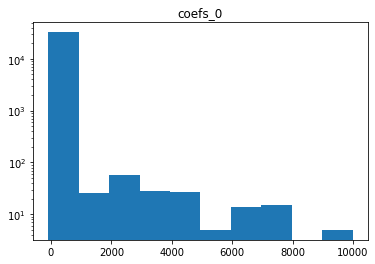

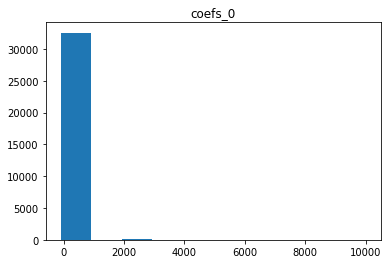

taking log


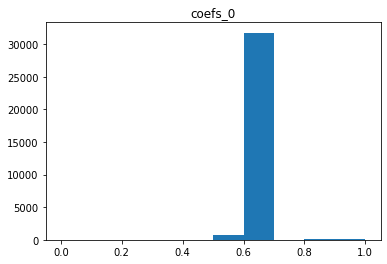

pvalue 0.0
coefs_1
coefs_1
max 1.4454505185120228
min -1.7504663243165597
null values 0


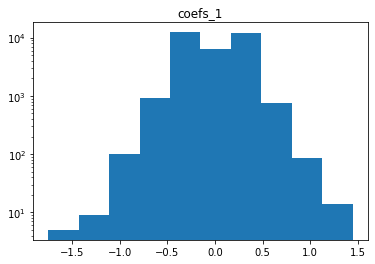

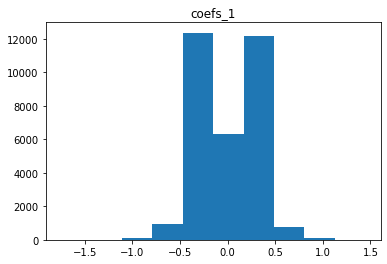

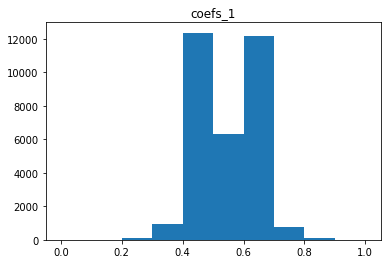

pvalue 0.022441348714371045
coefs_2
coefs_2
max 0.462193972301731
min 0.0051374559053667
null values 0


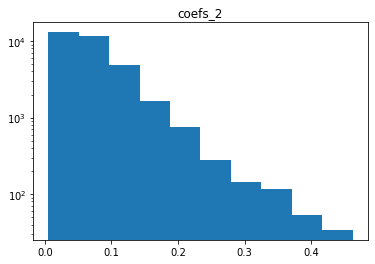

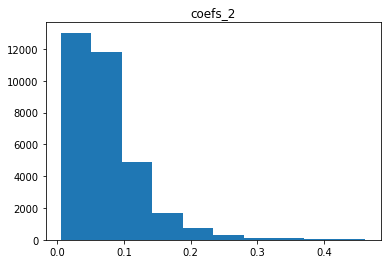

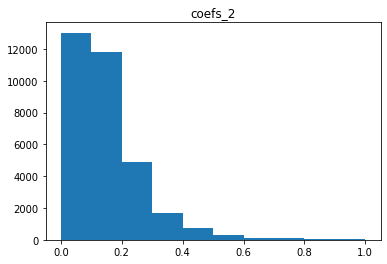

pvalue 0.0
higher_z
higher_z
max 9991.962176280873
min 0.0105039031610982
null values 0


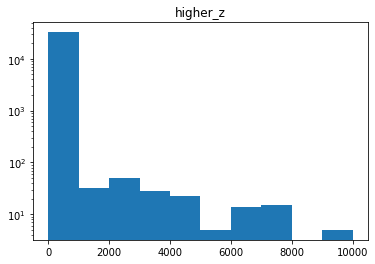

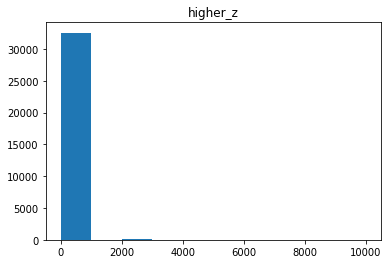

taking log


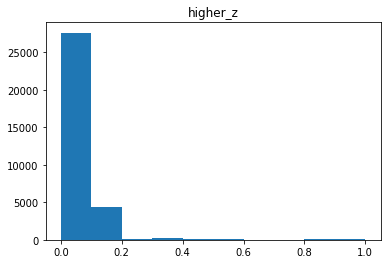

pvalue 0.0
initial_point_x
initial_point_x
max 1.9605555169113773
min -0.4479264332128223
null values 0


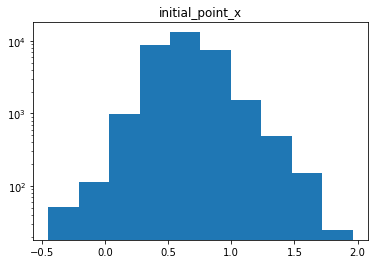

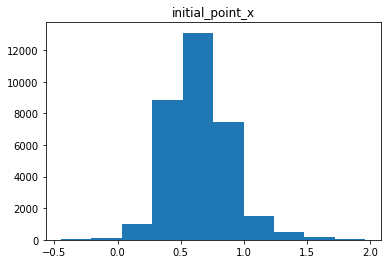

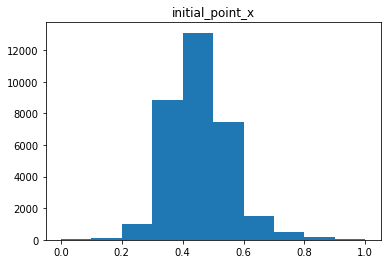

pvalue 0.0
initial_point_y
initial_point_y
max 1.495707865543942
min -1.0440310059823863
null values 0


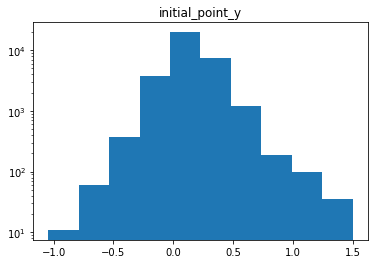

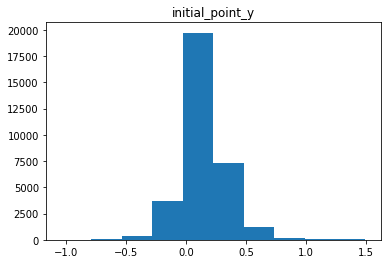

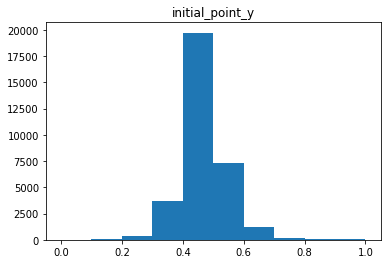

pvalue 0.0
final_point_x
final_point_x
max 1.9149992731629144
min -0.6125227873162825
null values 0


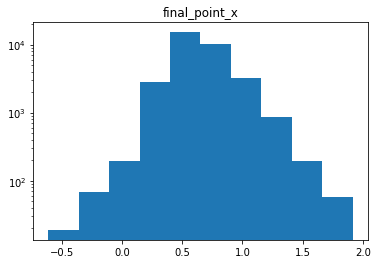

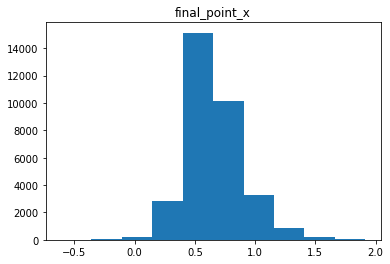

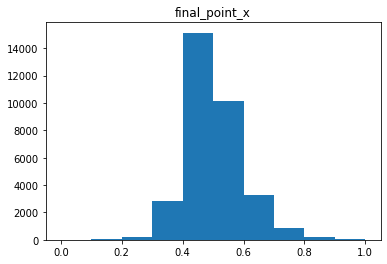

pvalue 0.0
final_point_y
final_point_y
max 1.5152647626699585
min -0.854766345645085
null values 0


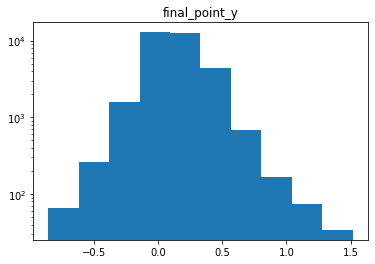

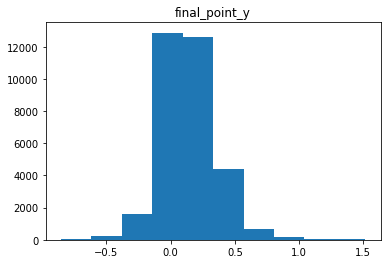

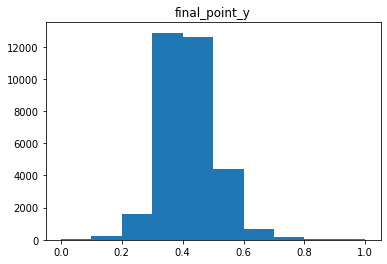

pvalue 2.8884571945414912e-266
nb_points
nb_points
max 100
min 1
null values 0


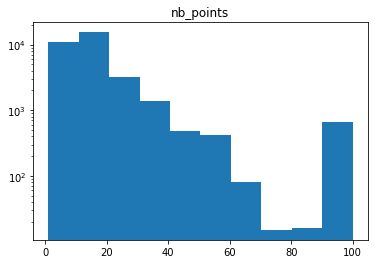

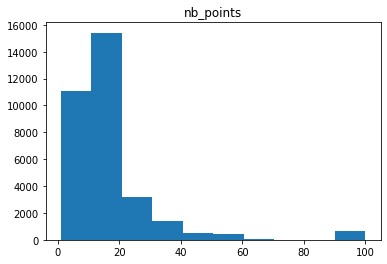

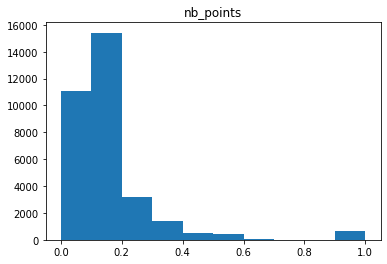

pvalue 0.0
nb_samples
nb_samples
max 105
min 1
null values 0


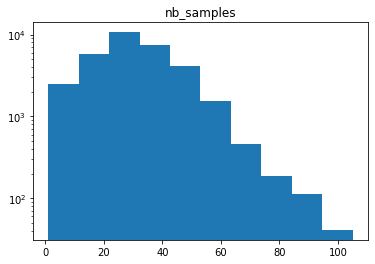

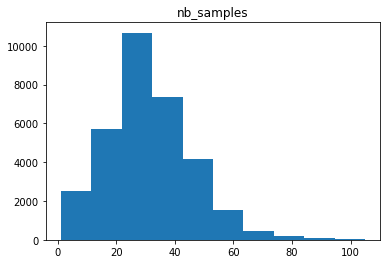

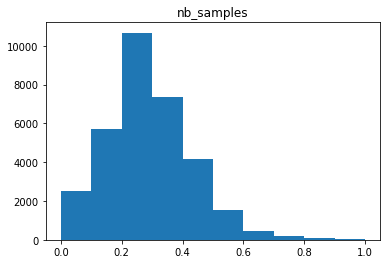

pvalue 0.0
cluster
cluster
max 2
min 0
null values 0


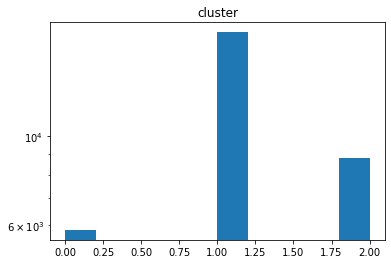

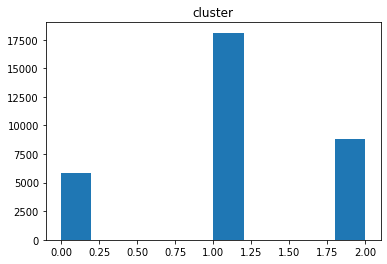

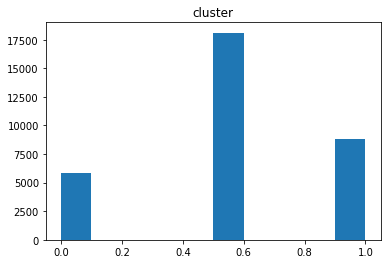

pvalue 0.0
max_speed
max_speed
max 1.8906234846782555e-06
min 0.0
null values 0


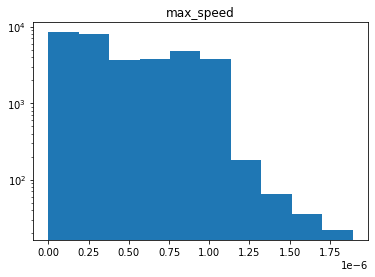

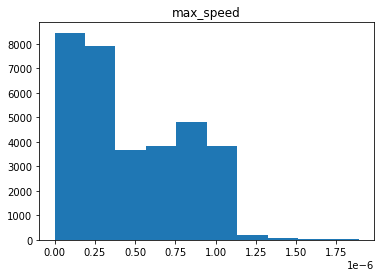

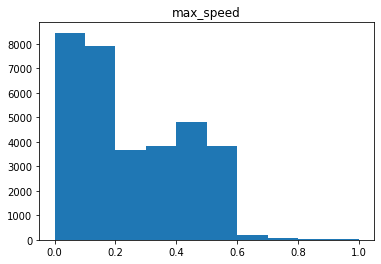

pvalue 2.4352577992569752e-177
min_speed
min_speed
max 9.314230643844436e-07
min 0.0
null values 0


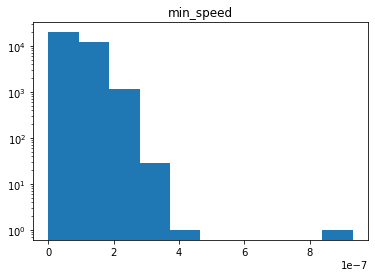

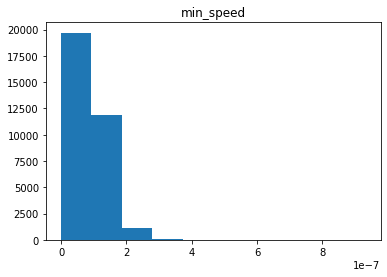

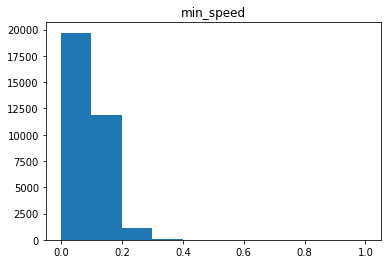

pvalue 0.0
mean_speed
mean_speed
max 9.314230643844436e-07
min 0.0
null values 0


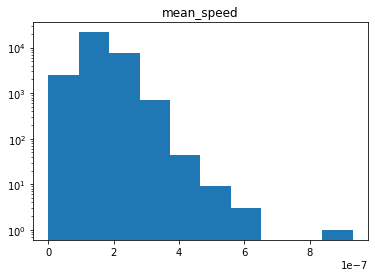

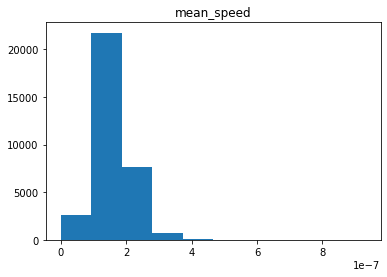

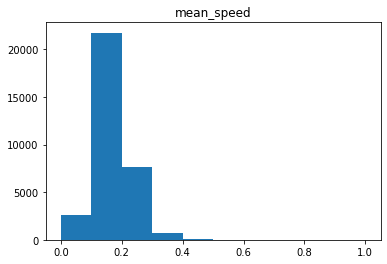

pvalue 0.0
q25_speed
q25_speed
max 9.314230643844436e-07
min 0.0
null values 0


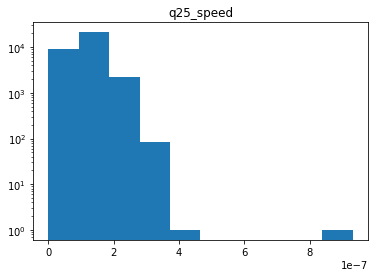

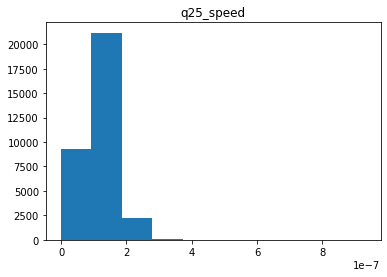

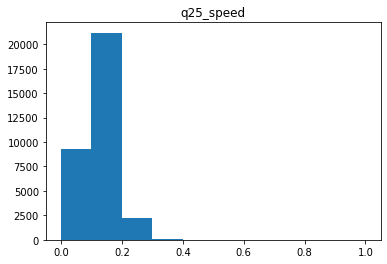

pvalue 0.0
q75_speed
q75_speed
max 9.449715038164828e-07
min 0.0
null values 0


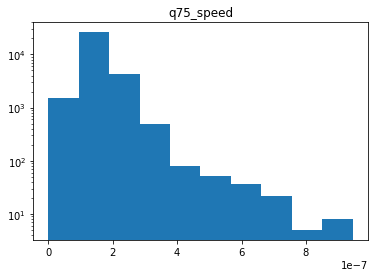

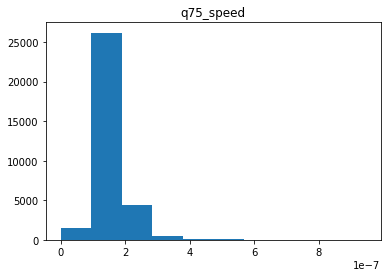

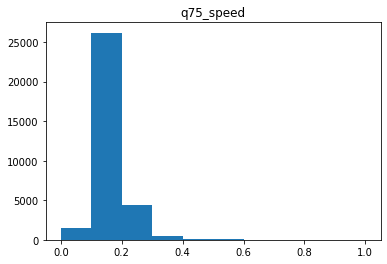

pvalue 0.0
median_speed
median_speed
max 9.314230643844436e-07
min 0.0
null values 0


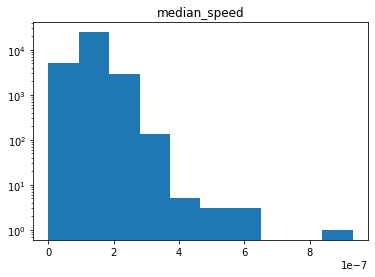

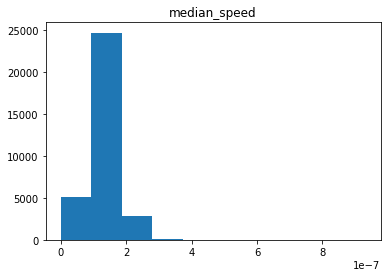

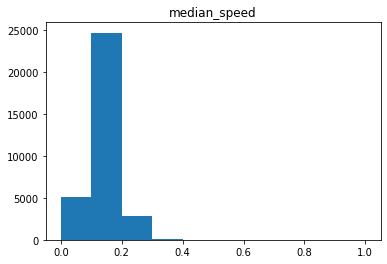

pvalue 0.0
max_acc
max_acc
max 1.3376868101073184e-06
min -3.949150945352353e-07
null values 0


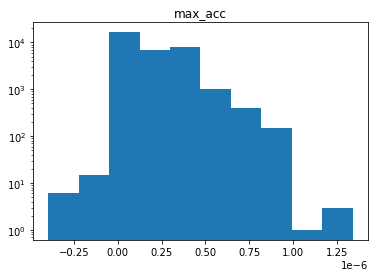

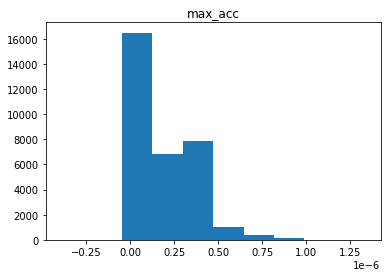

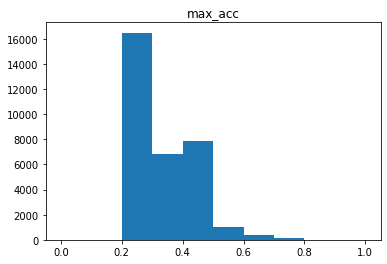

pvalue 9.712285294370419e-137
min_acc
min_acc
max 1.7988034367892385e-07
min -1.6640294425703066e-06
null values 0


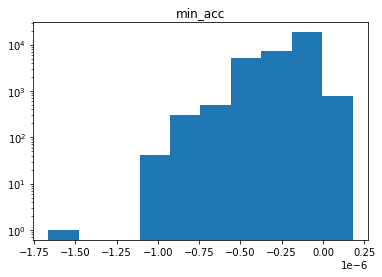

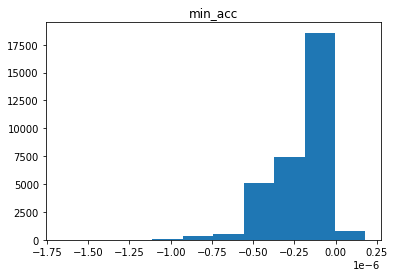

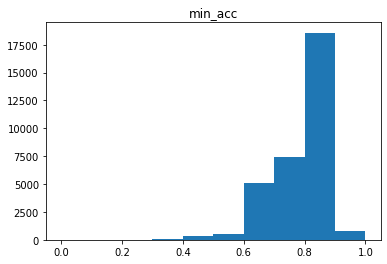

pvalue 2.3530540314793485e-127
mean_acc
mean_acc
max 3.320227249590033e-07
min -3.949150945352353e-07
null values 0


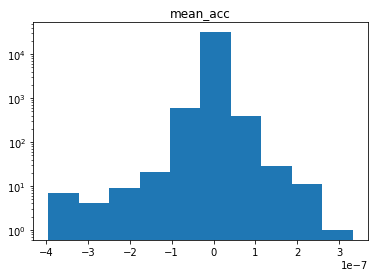

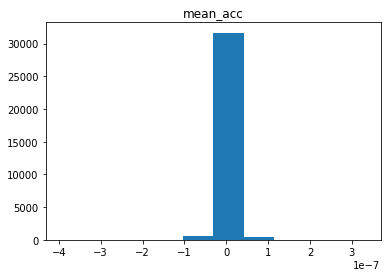

taking log


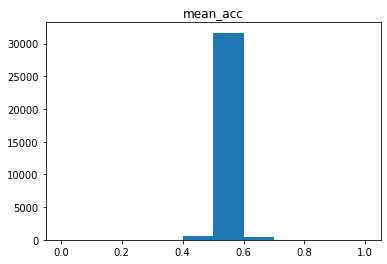

pvalue 1.2615651023219232e-36
q25_acc
q25_acc
max 1.7988034367892385e-07
min -8.199779940328642e-07
null values 0


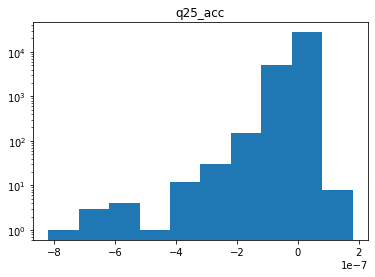

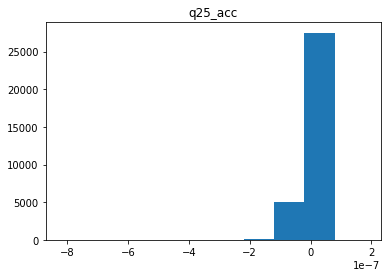

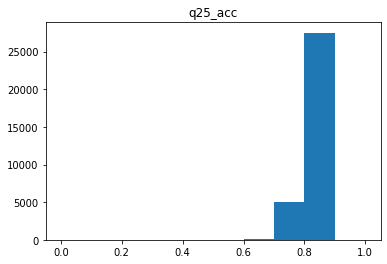

pvalue 2.5510530257099863e-26
q75_acc
q75_acc
max 5.57589712354736e-07
min -3.949150945352353e-07
null values 0


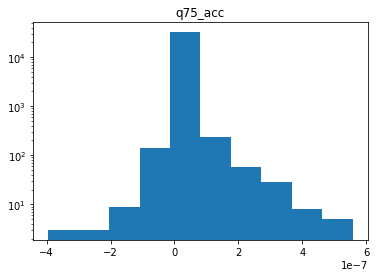

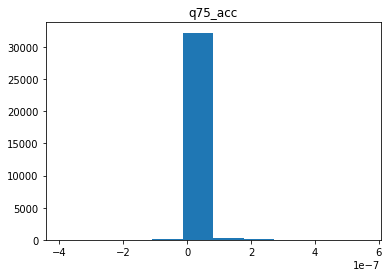

taking log


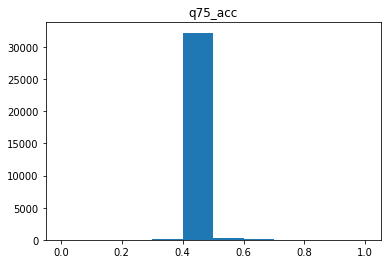

pvalue 8.536727983096243e-124
median_acc
median_acc
max 2.694353527524551e-07
min -3.949150945352353e-07
null values 0


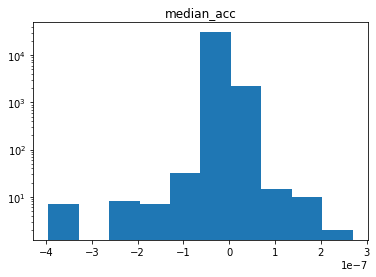

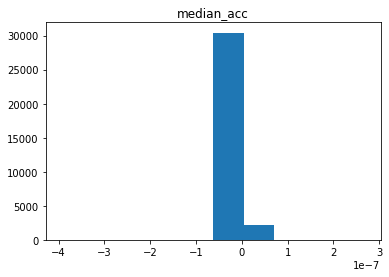

taking log


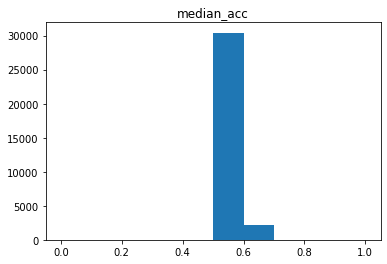

pvalue 6.977826245368812e-52
max_speed_z
max_speed_z
max 0.0143720329909999
min -0.00246023012
null values 0


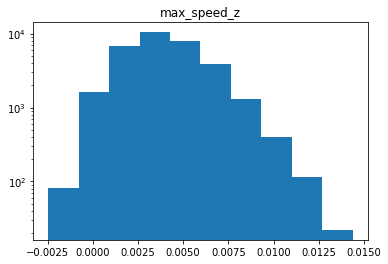

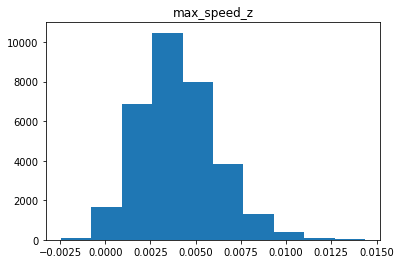

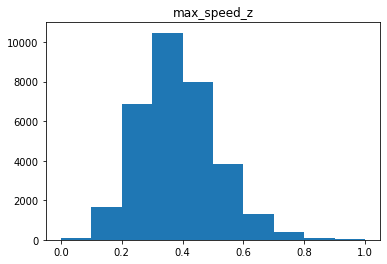

pvalue 0.0
min_speed_z
min_speed_z
max 0.008018024916
min -0.017968897888426
null values 0


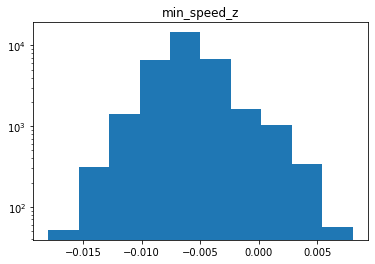

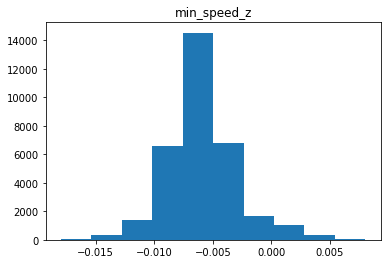

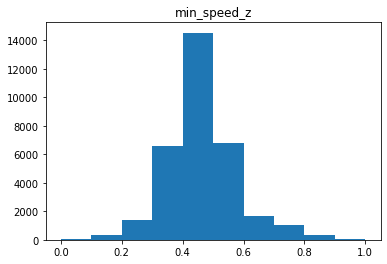

pvalue 0.0
mean_speed_z
mean_speed_z
max 0.0099590810505
min -0.0030929484491686
null values 0


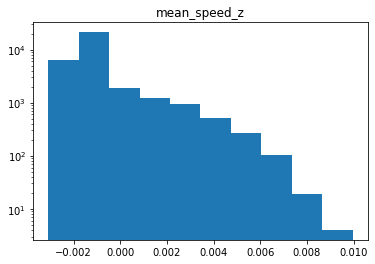

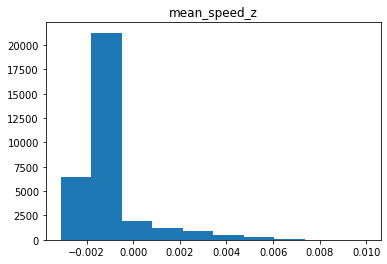

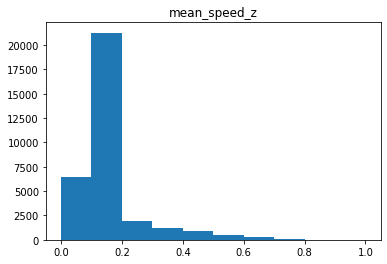

pvalue 0.0
q25_speed_z
q25_speed_z
max 0.0086158965808749
min -0.0093402675145
null values 0


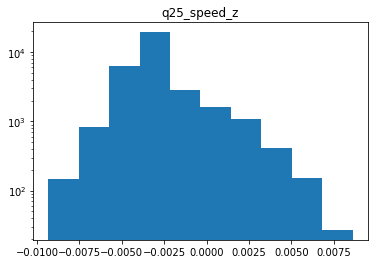

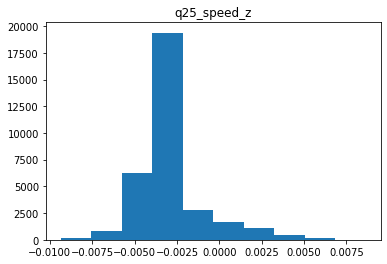

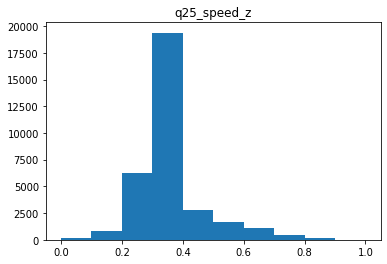

pvalue 0.0
q75_speed_z
q75_speed_z
max 0.0105984321793749
min -0.00246023012
null values 0


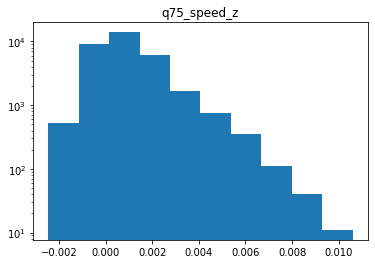

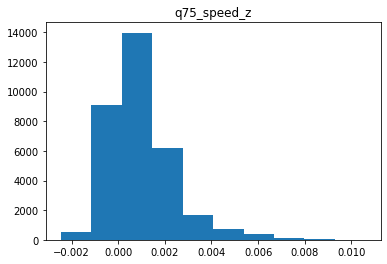

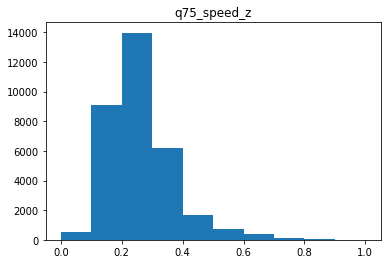

pvalue 0.0
median_speed_z
median_speed_z
max 0.010015631845
min -0.0033626089587499
null values 0


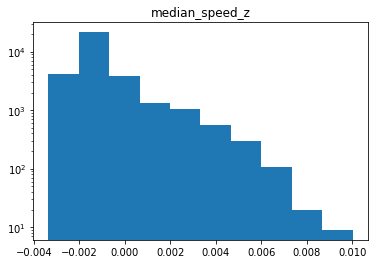

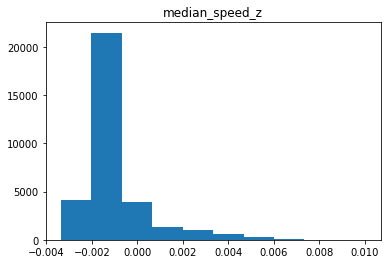

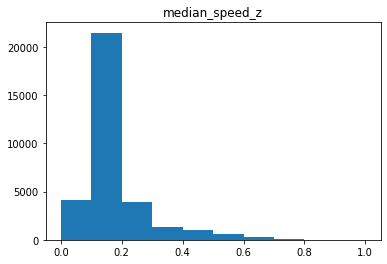

pvalue 0.0
max_acc_z
max_acc_z
max 0.0078507093884
min -0.0034363886235999
null values 0


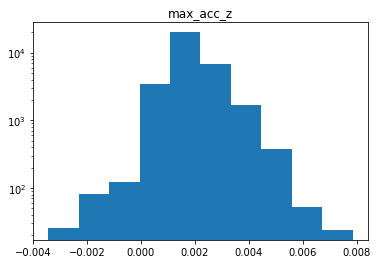

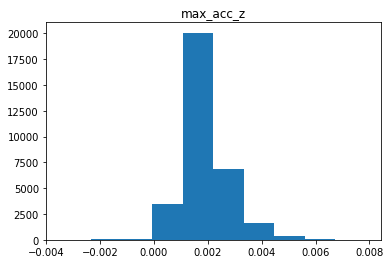

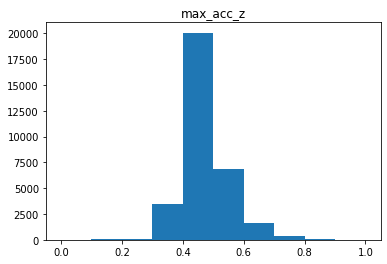

pvalue 4.736745395418227e-59
min_acc_z
min_acc_z
max 0.0027378550645
min -0.00720813706665
null values 0


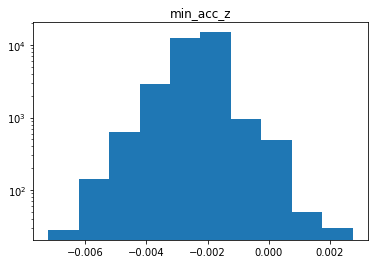

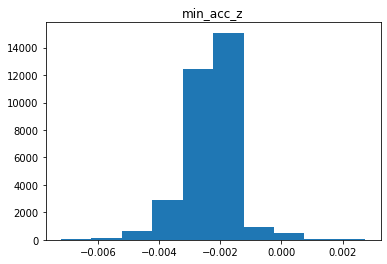

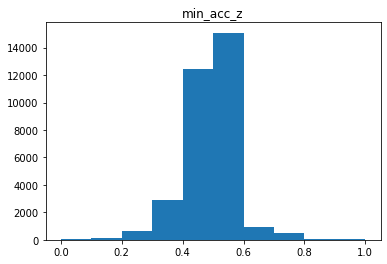

pvalue 1.92196769518949e-37
mean_acc_z
mean_acc_z
max 0.0027378550645
min -0.0034363886235999
null values 0


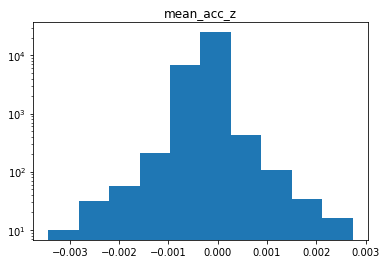

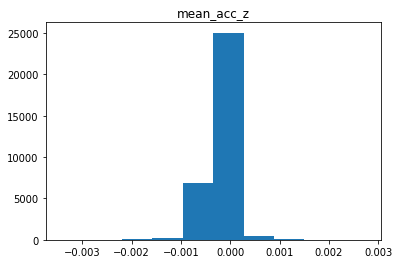

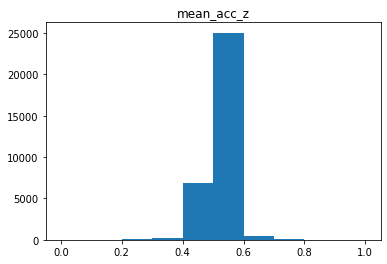

pvalue 0.05971122810940738
q25_acc_z
q25_acc_z
max 0.0027378550645
min -0.00518427481415
null values 0


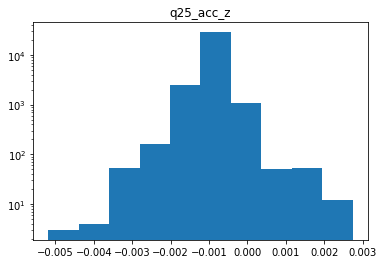

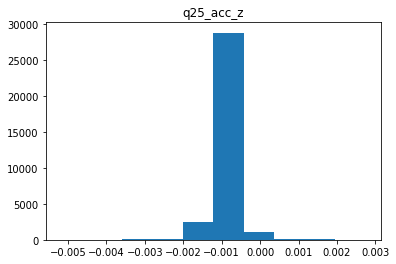

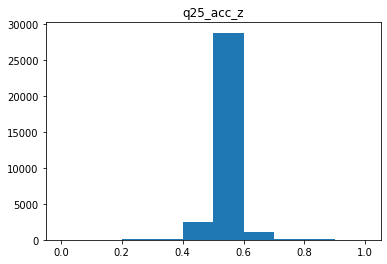

pvalue 0.22750499435669774
q75_acc_z
q75_acc_z
max 0.0043769574154999
min -0.0034363886235999
null values 0


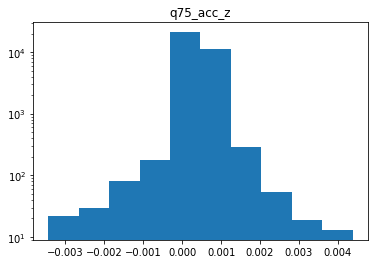

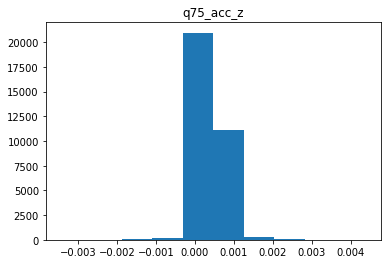

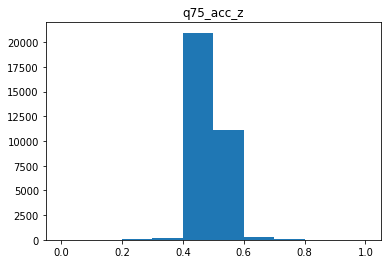

pvalue 0.3004666621682166
median_acc_z
median_acc_z
max 0.0027378550645
min -0.0034363886235999
null values 0


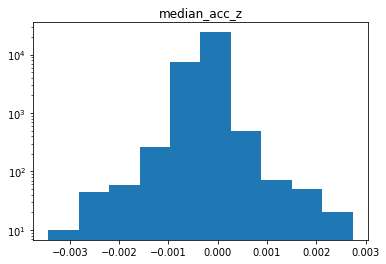

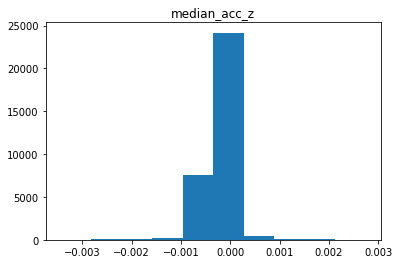

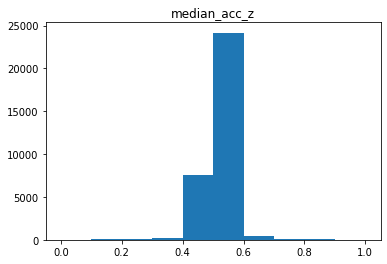

pvalue 0.00016877566472093695
energy_z
energy_z
max 14.217595585169477
min 0.0001943993699281
null values 0


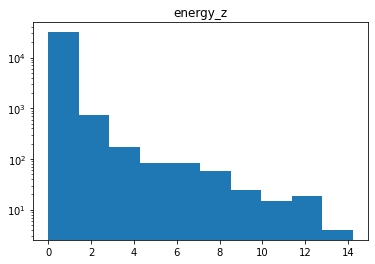

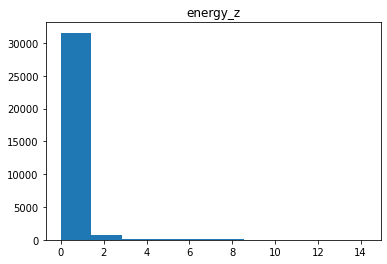

taking log


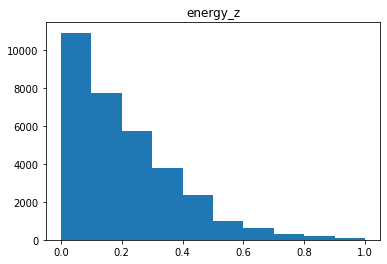

pvalue 0.0
absolute_sum
above_mean
above_mean
max 63
min 0
null values 0


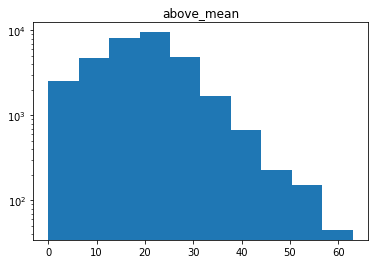

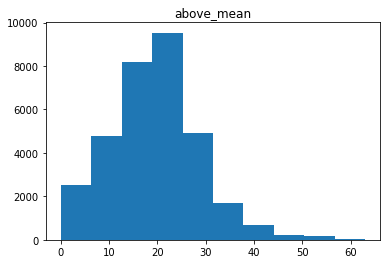

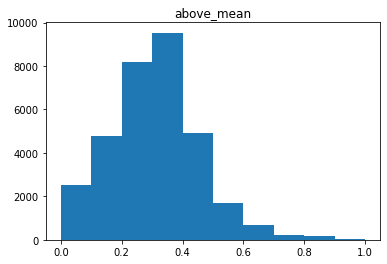

pvalue 0.0
below_mean
below_mean
max 42
min 0
null values 0


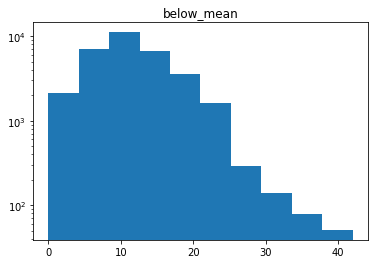

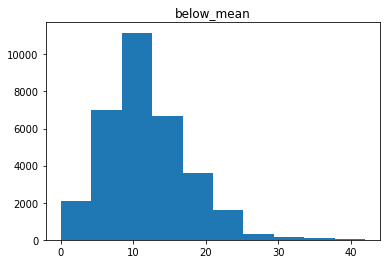

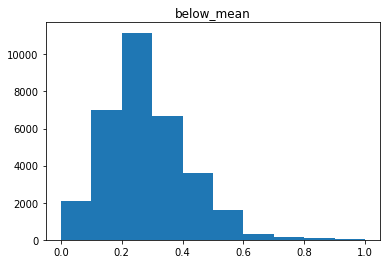

pvalue 0.0
min_fft
min_fft
max 7.987252336692538
min 9.606855600000076e-05
null values 0


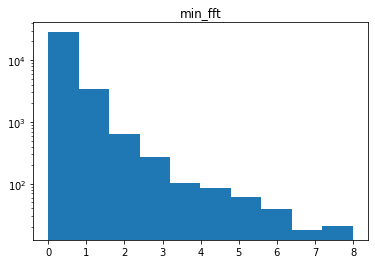

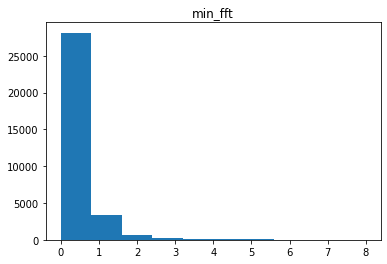

taking log


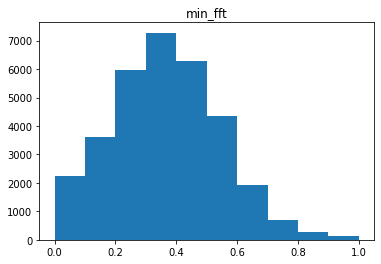

pvalue 0.0
down_fft
down_fft
max 42.35287840712615
min 0.0
null values 0


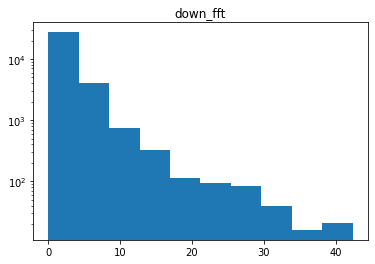

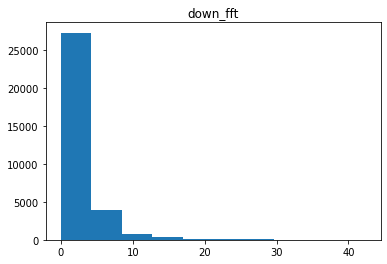

taking log


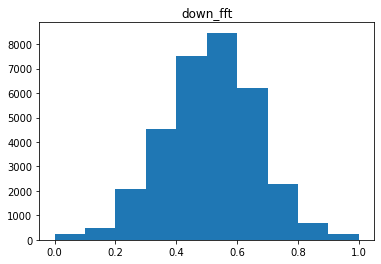

pvalue 0.0


In [40]:
for col in train_features.columns:
    print(col)
    if (col == 'label') or (col == 'time_stamp') or (col == 'traj') or (col == 'absolute_sum'):
        continue
    feat = train_features[col]

    print(col)
    print('max', np.max(feat))
    print('min', np.min(feat))
    print('null values', feat.isnull().sum())
    
    plt.figure()
    plt.hist(feat)
    plt.title(col)
    plt.yscale('log')
    plt.show()

    plt.figure()
    plt.hist(feat)
    plt.title(col)
    plt.show()
    
    if col in log_features:
        feat = np.log(feat - feat.min() + 0.05)
        print('taking log')
    scaler = MinMaxScaler()
    scaler.fit(feat.values.reshape(-1, 1))
    feat = scaler.transform(feat.values.reshape(-1, 1))

    plt.figure()
    plt.hist(feat)
    plt.title(col)
    plt.show()
    
    
    s, pvalue = stats.kruskal(feat[train_features['label'] == 0], 
                              feat[train_features['label'] == 1],
                              feat[train_features['label'] == 2])
    print('pvalue', pvalue)

In [22]:
train_features['absolute_sum'].isnull().sum()

32741

In [10]:
np.isinf(train_features).values.sum()

0

In [12]:
train_features.isin([np.inf, -np.inf]).any()

label           False
traj            False
coefs_0         False
coefs_1         False
coefs_2         False
higher_z        False
nb_samples      False
cluster         False
max_speed       False
min_speed       False
mean_speed      False
q25_speed       False
q75_speed       False
median_speed    False
max_acc         False
min_acc         False
mean_acc        False
q25_acc         False
q75_acc         False
median_acc      False
dtype: bool

In [41]:
X = pd.read_csv(os.path.join('data_csv', 'features_train.csv'))

In [42]:
X.describe()

,label,traj,coefs_0,coefs_1,coefs_2,higher_z,initial_point_x,initial_point_y,final_point_x,final_point_y,...,mean_acc_z,q25_acc_z,q75_acc_z,median_acc_z,energy_z,absolute_sum,above_mean,below_mean,min_fft,down_fft
count,32741.000000,32741.000000,32523.000000,32523.000000,32523.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,...,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000
mean,0.385388,16370.000000,15.694212,0.002840,0.074588,20.264601,0.652484,0.145637,0.654505,0.142325,...,-0.000235,-0.000885,0.000406,-0.000240,0.281306,0.094698,19.454201,11.753092,0.447077,2.620387
std,0.616242,9451.656918,314.134707,0.297315,0.054139,312.795994,0.239346,0.196861,0.242958,0.203334,...,0.000259,0.000333,0.000327,0.000271,0.802170,0.071423,9.267027,5.529777,0.629124,3.491951
min,0.000000,0.000000,-89.563283,-1.750466,0.005137,0.010504,-0.447926,-1.044031,-0.612523,-0.854766,...,-0.003436,-0.005184,-0.003436,-0.003436,0.000194,0.000000,0.000000,0.000000,0.000096,0.000000
25%,0.000000,8185.000000,-5.767861,-0.243372,0.037942,0.042731,0.507471,0.063006,0.506332,0.061030,...,-0.000332,-0.001025,0.000251,-0.000345,0.025439,0.049760,13.000000,8.000000,0.123647,0.767184
50%,0.000000,16370.000000,-3.680552,0.013339,0.060678,0.066337,0.596348,0.106971,0.595872,0.106532,...,-0.000240,-0.000872,0.000387,-0.000240,0.077504,0.078439,19.000000,11.000000,0.264949,1.577515
75%,1.000000,24555.000000,-2.366587,0.249209,0.095173,0.103760,0.816338,0.248304,0.830395,0.238545,...,-0.000137,-0.000736,0.000540,-0.000132,0.227192,0.120978,25.000000,15.000000,0.536102,3.152234
max,2.000000,32740.000000,9990.172770,1.445451,0.462194,9991.962176,1.960556,1.495708,1.914999,1.515265,...,0.002738,0.002738,0.004377,0.002738,14.217596,0.709092,63.000000,42.000000,7.987252,42.352878


In [43]:
for feat in log_features:
    X[feat] = np.log(X[feat] - X[feat].min() + 0.05)

In [44]:
X.describe()

,label,traj,coefs_0,coefs_1,coefs_2,higher_z,initial_point_x,initial_point_y,final_point_x,final_point_y,...,mean_acc_z,q25_acc_z,q75_acc_z,median_acc_z,energy_z,absolute_sum,above_mean,below_mean,min_fft,down_fft
count,32741.000000,32741.000000,32523.000000,32523.000000,32523.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,...,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000,32741.000000
mean,0.385388,16370.000000,4.460151,0.002840,0.074588,-2.085890,0.652484,0.145637,0.654505,0.142325,...,-0.000235,-0.000885,0.000406,-0.000240,-1.816355,0.094698,19.454201,11.753092,-1.132634,0.464572
std,0.616242,9451.656918,0.308535,0.297315,0.054139,0.994690,0.239346,0.196861,0.242958,0.203334,...,0.000259,0.000333,0.000327,0.000271,0.975769,0.071423,9.267027,5.529777,0.899619,1.036458
min,0.000000,0.000000,-2.995732,-1.750466,0.005137,-2.995732,-0.447926,-1.044031,-0.612523,-0.854766,...,-0.003436,-0.005184,-0.003436,-0.003436,-2.995732,0.000000,0.000000,0.000000,-2.995732,-2.995732
25%,0.000000,8185.000000,4.428975,-0.243372,0.037942,-2.498269,0.507471,0.063006,0.506332,0.061030,...,-0.000332,-0.001025,0.000251,-0.000345,-2.587011,0.049760,13.000000,8.000000,-1.751282,-0.201891
50%,0.000000,16370.000000,4.453565,0.013339,0.060678,-2.245889,0.596348,0.106971,0.595872,0.106532,...,-0.000240,-0.000872,0.000387,-0.000240,-2.061133,0.078439,19.000000,11.000000,-1.155650,0.487054
75%,1.000000,24555.000000,4.468740,0.249209,0.095173,-1.943119,0.816338,0.248304,0.830395,0.238545,...,-0.000137,-0.000736,0.000540,-0.000132,-1.283745,0.120978,25.000000,15.000000,-0.534425,1.163849
max,2.000000,32740.000000,9.218287,1.445451,0.462194,9.209540,1.960556,1.495708,1.914999,1.515265,...,0.002738,0.002738,0.004377,0.002738,2.657977,0.709092,63.000000,42.000000,2.084075,3.747216


## Check split

In [52]:
X = pd.read_csv(os.path.join('data_csv', 'features_train.csv'))
X['time_stamp'] = pd.to_datetime(X['time_stamp'])

X_train_1 = X.loc[X['time_stamp'] < X['time_stamp'].quantile(q=0.6)]

X_others = X.loc[X['time_stamp'] >= X['time_stamp'].quantile(q=0.6)]
X_train_2 = X_others.loc[X_others['time_stamp'] < X_others['time_stamp'].quantile(q=0.5)]
X_val = X_others.loc[X_others['time_stamp'] >= X_others['time_stamp'].quantile(q=0.5)]

X_test = pd.read_csv(os.path.join('data_csv', 'features_test.csv'))

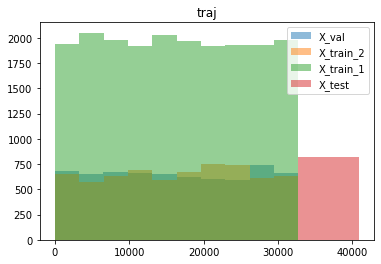

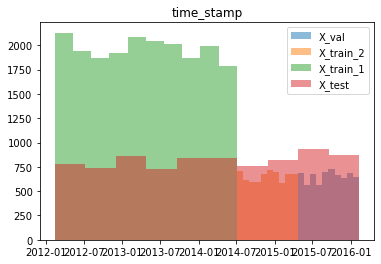

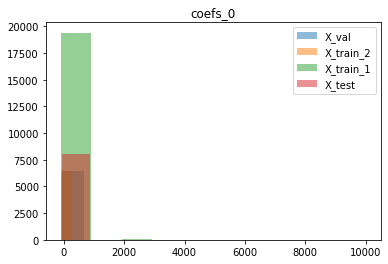

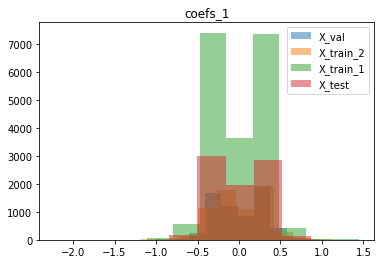

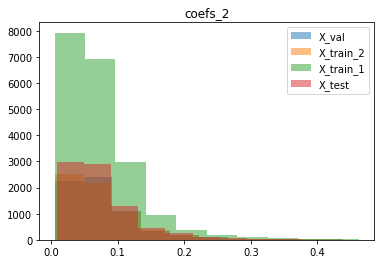

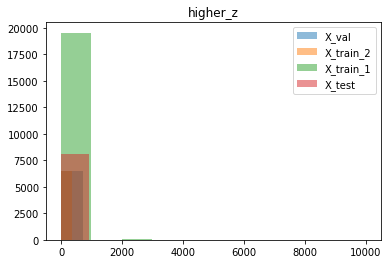

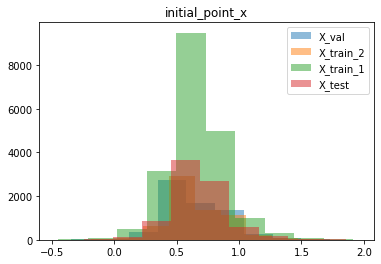

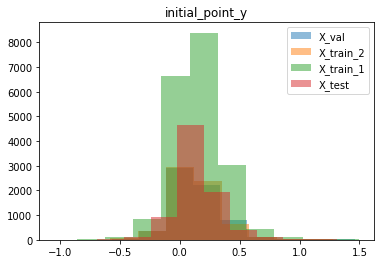

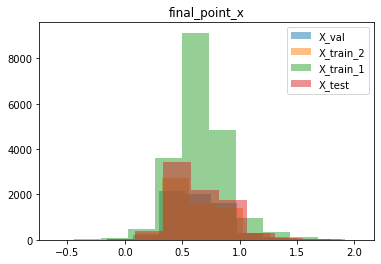

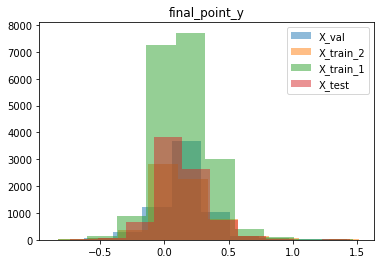

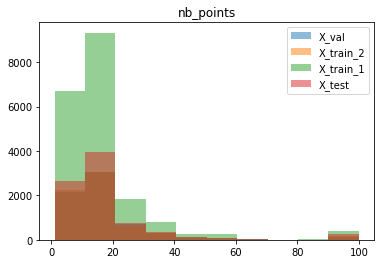

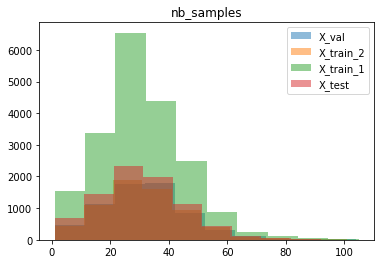

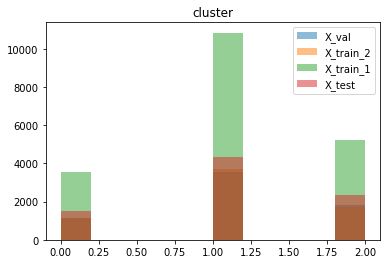

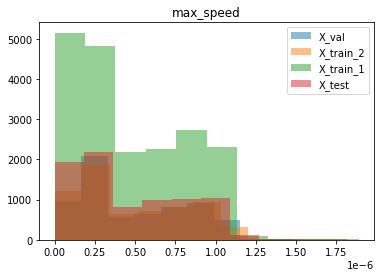

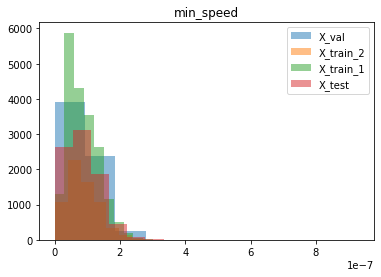

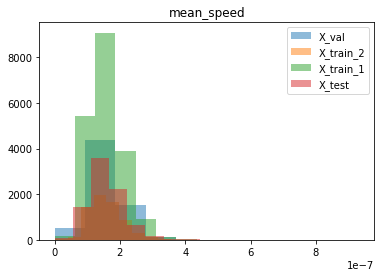

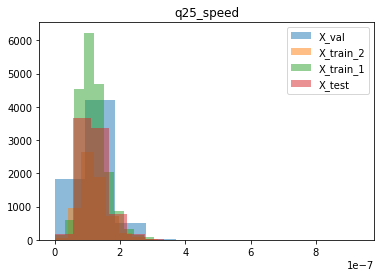

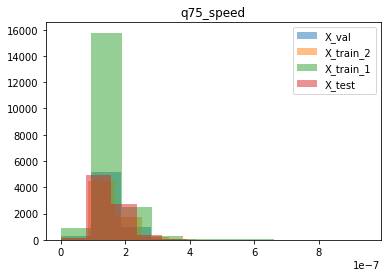

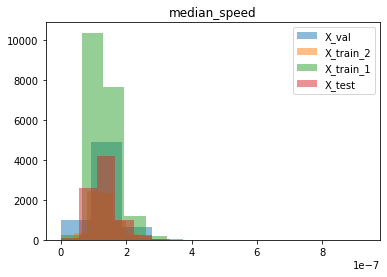

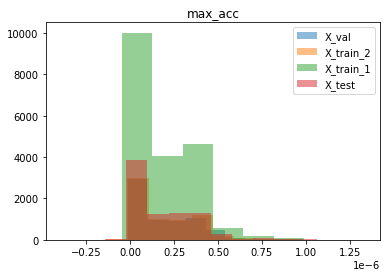

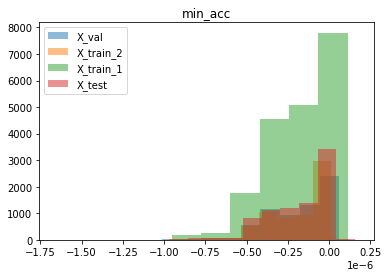

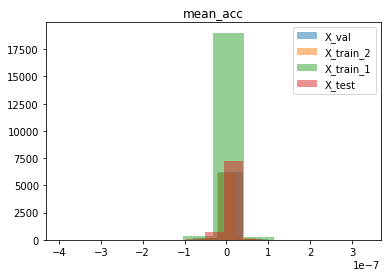

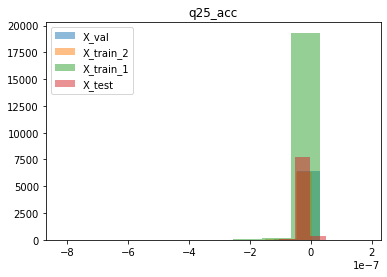

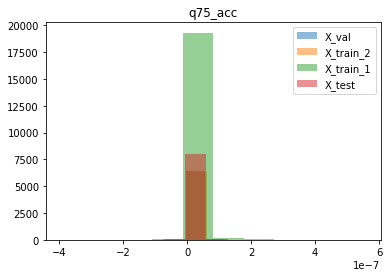

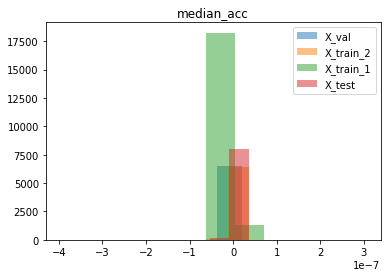

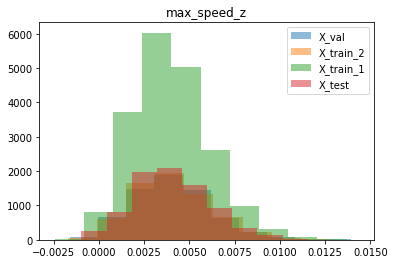

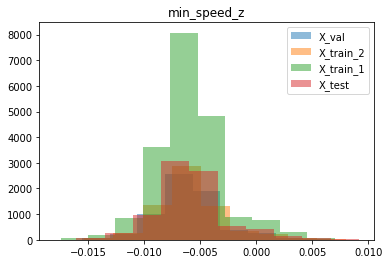

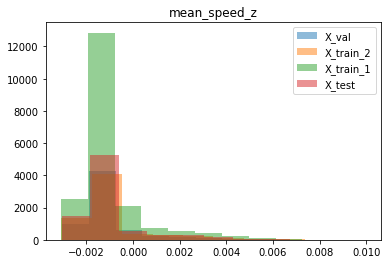

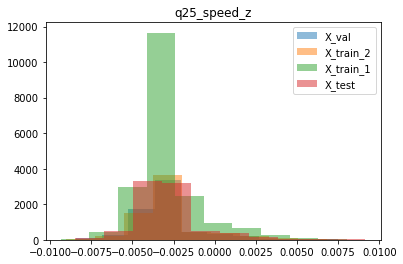

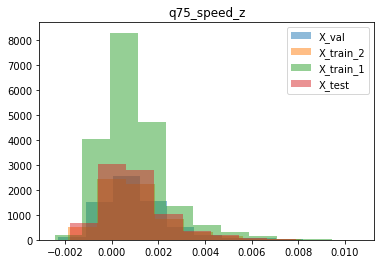

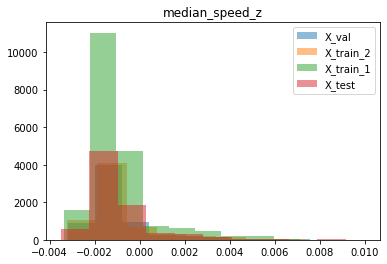

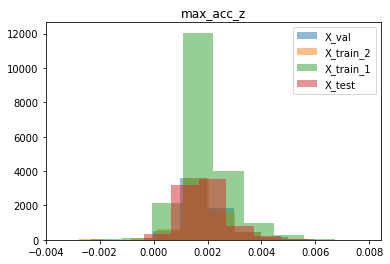

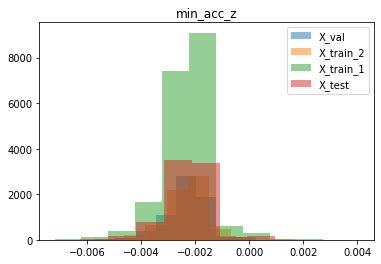

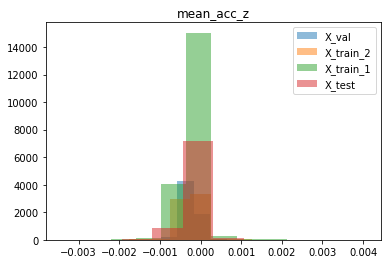

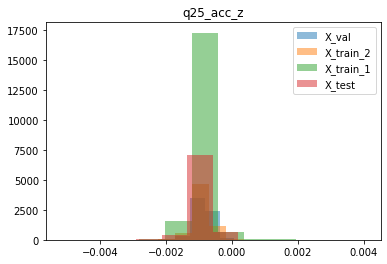

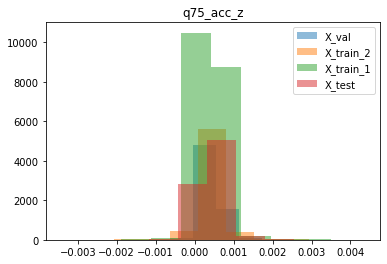

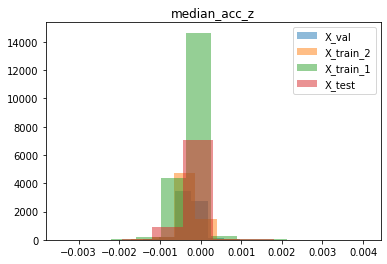

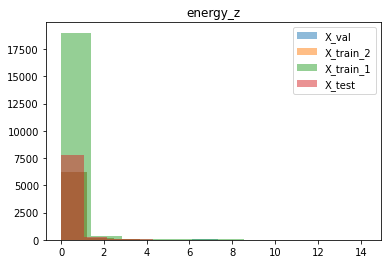

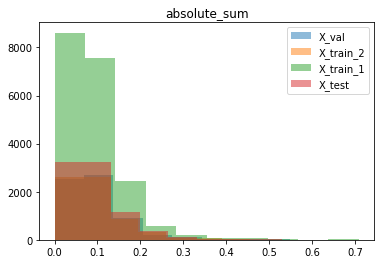

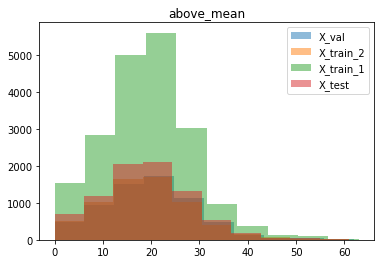

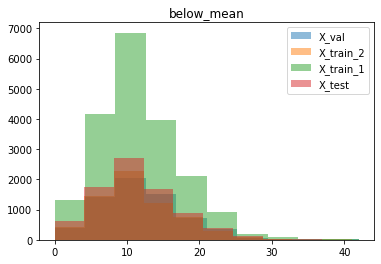

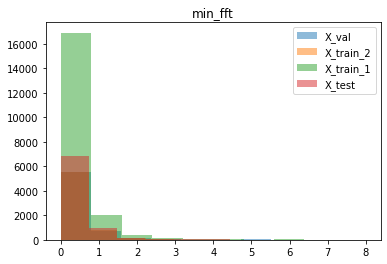

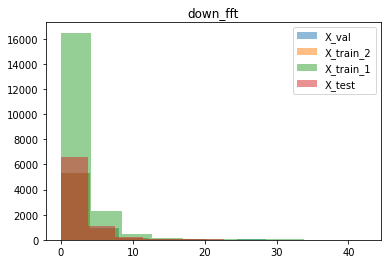

In [53]:
for col in X_val.columns:
    if col == 'label':
        continue
    plt.figure()
    plt.hist(X_val[col], label='X_val', alpha=0.5)
    plt.hist(X_train_2[col], label='X_train_2', alpha=0.5)
    plt.hist(X_train_1[col], label='X_train_1', alpha=0.5)
    plt.hist(X_test[col], label='X_test', alpha=0.5)
    plt.title(col)
    plt.legend()
    plt.show()
    